# Topic And Trend Detection In Scientific Papers
## Text Mining Project 2018

Done By:
###### Samia Ben Fredj
###### Marouene Zouaoui

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

## Load dataset

In [2]:
dataset_loaded = pd.read_csv('resource/data.csv', delimiter='|')

In [3]:
dataset_loaded.head()

,title,year,Abstract,Keywords,Keywords-Plus,Web-of-Science-Categories,Times-Cited,Usage-Count-Last-180-days,Usage-Count-Since-2013
0,Enhancing deep learning sentiment analysis wit...,2017,Deep learning techniques for Sentiment Analysi...,Ensemble; Deep learning; Sentiment analysis; M...,CLASSIFICATION; POLARITY,"Computer Science, Artificial Intelligence; Eng...",5,14,93
1,Impact of media richness and flow on e-learnin...,2009,Advances in e-learning technologies parallels ...,Distance education and telelearning; Teaching/...,INFORMATION-TECHNOLOGY; USER ACCEPTANCE; INTER...,"Computer Science, Interdisciplinary Applicatio...",158,4,93
2,What's buzzing in the blizzard of buzz? Automo...,2013,"In the blizzard of social media postings, isol...",Social media analytics; Diagnostics; Text mini...,CUSTOMER COMPLAINT MANAGEMENT; TEXT CATEGORIZA...,"Computer Science, Artificial Intelligence; Com...",28,3,90
3,Community of inquiry as a theoretical framewor...,2009,"In this paper, several recent theoretical conc...",Online learning; Theory; Community of inquiry ...,GENDER,"Computer Science, Interdisciplinary Applicatio...",147,7,90
4,Exploring determinants of voting for the ``hel...,2011,The ``helpfulness{''} feature of online user r...,Online user review; Helpfulness; Text mining; ...,WORD-OF-MOUTH; LATENT SEMANTIC ANALYSIS; INFOR...,"Computer Science, Artificial Intelligence; Com...",108,14,89


## Clean Dataset
In order to clean the dataset we will do the following actions:
- Drop year column.
- Remove special characters
- Remove numbers.
- Remove words which has a length less than 3 letters.
- Remove multiple spaces.
- Lowercase the sentences.

In [5]:
# drop year column
dataset = dataset_loaded.drop(['year'], axis = 1)
dataset.head()

,title,Abstract,Keywords,Keywords-Plus,Web-of-Science-Categories,Times-Cited,Usage-Count-Last-180-days,Usage-Count-Since-2013
0,Enhancing deep learning sentiment analysis wit...,Deep learning techniques for Sentiment Analysi...,Ensemble; Deep learning; Sentiment analysis; M...,CLASSIFICATION; POLARITY,"Computer Science, Artificial Intelligence; Eng...",5,14,93
1,Impact of media richness and flow on e-learnin...,Advances in e-learning technologies parallels ...,Distance education and telelearning; Teaching/...,INFORMATION-TECHNOLOGY; USER ACCEPTANCE; INTER...,"Computer Science, Interdisciplinary Applicatio...",158,4,93
2,What's buzzing in the blizzard of buzz? Automo...,"In the blizzard of social media postings, isol...",Social media analytics; Diagnostics; Text mini...,CUSTOMER COMPLAINT MANAGEMENT; TEXT CATEGORIZA...,"Computer Science, Artificial Intelligence; Com...",28,3,90
3,Community of inquiry as a theoretical framewor...,"In this paper, several recent theoretical conc...",Online learning; Theory; Community of inquiry ...,GENDER,"Computer Science, Interdisciplinary Applicatio...",147,7,90
4,Exploring determinants of voting for the ``hel...,The ``helpfulness{''} feature of online user r...,Online user review; Helpfulness; Text mining; ...,WORD-OF-MOUTH; LATENT SEMANTIC ANALYSIS; INFOR...,"Computer Science, Artificial Intelligence; Com...",108,14,89


In [6]:
dataset_array = dataset.values
data = np.array([])
for i in range(dataset.shape[0]):
    data_row = dataset_array[i][:4]
    data_row_string = ' '.join(data_row)
    data_row_string = re.sub('\W+', ' ', data_row_string) #remove special characters
    data_row_string = re.sub("\d+", "", data_row_string)  # remove numbers
    data_row_string = re.sub(r'\b\w{1,3}\b', '', data_row_string)  # remove words which has a length less than 3 letters.
    data_row_string = re.sub(' +',' ',data_row_string)
    clean_data_row_string = data_row_string.lower()
    data = np.append(data, np.array([clean_data_row_string]), axis=0)

In [7]:
data[0]

'enhancing deep learning sentiment analysis with ensemble techniques social applications deep learning techniques sentiment analysis have become very popular they provide automatic feature extraction both richer representation capabilities better performance than traditional feature based techniques surface methods traditional surface approaches based complex manually extracted features this extraction process fundamental question feature driven methods these long established approaches yield strong baselines their predictive capabilities used conjunction with arising deep learning methods this paper seek improve performance deep learning techniques integrating them with traditional surface approaches based manually extracted features contributions this paper sixfold first develop deep learning based sentiment classifier using word embeddings model linear machine learning algorithm this classifier serves baseline compare subsequent results second propose ensemble techniques which aggre

## Feature Extraction 
For the feature engineering we will use:
- **Tfidf Vectorizer**
- **Counter Vectorizer**


In [8]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(data)

In [9]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data)

## Clustering
For the clustering we will use both :
- **LatentDirichletAllocation** : Experiments says that LDA performs well with **CountVectorizer** as a feature extractor.
- **NMF** : Experiments says that NMF performs well with **TfidfVectorizer** as a feature extractor.

We chose to cluster into **5 components** (Topics in our case).

**Remark:** LDA took approximatelly 1 minute to fit into the vectorizer otherwise, NMF took approximately 2 seconds to fit the vectorizer.

In [10]:
%%time
lda = LatentDirichletAllocation(n_components=5, max_iter=100,
                                       verbose=0, evaluate_every=1,
                                       learning_method='batch',
                                       learning_offset=50.,
                                       random_state=0)
lda.fit(tf)

CPU times: user 1min 31s, sys: 1.48 s, total: 1min 32s
Wall time: 1min 7s


In [11]:
%%time
nmf = NMF(n_components=5, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit(tfidf)

CPU times: user 1.22 s, sys: 71.7 ms, total: 1.3 s
Wall time: 2.01 s


## Top Words By Topic
For each topic, this function prints the top 10 words that describe it.

In [49]:
def TopWordsByTopic(model,number_top_words):
    
    if model == 'NMF':
        components = nmf.components_
        vectorizer = tfidf_vectorizer
    elif model == 'LDA':
        components = lda.components_
        vectorizer = tf_vectorizer
    else:
        print('Model is invalid')
        return
    print('\nTopics in '+ model +' model:')
    feature_names = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(components):
        message = "Topic #%d: " % (topic_idx + 1)
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-number_top_words - 1:-1]])
        print(message)
    print()

In [50]:
%%time
TopWordsByTopic('LDA', 10)


Topics in LDA model:
Topic #1: analysis research text articles science based citation scientific patent paper
Topic #2: text information based clinical semantic data language results using processing
Topic #3: language discourse analysis speech texts text linguistic word corpus english
Topic #4: language writing students study english analysis reading text texts learners
Topic #5: analysis language model sentiment learning social natural text knowledge based

CPU times: user 38.4 ms, sys: 200 µs, total: 38.6 ms
Wall time: 9.35 ms


In [51]:
%%time
TopWordsByTopic('NMF', 10)


Topics in NMF model:
Topic #1: language semantic text based knowledge analysis information model research discourse
Topic #2: writing students academic english language genre writers student texts written
Topic #3: reading comprehension children students readers group listening vocabulary read skills
Topic #4: clinical medical health extraction electronic annotation records information patient notes
Topic #5: sentiment emotion twitter emotions analysis lexicon lexicons tweets opinion detection

CPU times: user 32.1 ms, sys: 3.63 ms, total: 35.7 ms
Wall time: 8.66 ms


**Remark:** The terms are better understandable using the NMF model

# Visualisation
We have to prepare our data for the visualisation, and in order to do that we labeled every paper with the topic corresponding.

In [57]:
topicId = np.array([],dtype=int)
doc_topic = nmf.transform(tfidf)   # Transform data according to the fitted model.
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    topicId = np.append(topicId,[topic_most_pr],axis = 0)
topicPapers = np.column_stack((dataset_loaded, topicId)) #numpy array contains our papers with the corresponding topic id

Each row of the topicPapers array contains the paper and the topic number corresponding.

In [88]:
topicPapers[0]

array(['Enhancing deep learning sentiment analysis with ensemble techniques in social applications',
       2017,
       'Deep learning techniques for Sentiment Analysis have become very popular. They provide automatic feature extraction and both richer representation capabilities and better performance than traditional feature based techniques (i.e., surface methods). Traditional surface approaches are based on complex manually extracted features, and this extraction process is a fundamental question in feature driven methods. These long-established approaches can yield strong baselines, and their predictive capabilities can be used in conjunction with the arising deep learning methods. In this paper we seek to improve the performance of deep learning techniques integrating them with traditional surface approaches based on manually extracted features. The contributions of this paper are sixfold. First, we develop a deep learning based sentiment classifier using a word embeddings model

## Visualisation of the evolution of every topic through years (1990-2018)

In [86]:
def plotTopicYear(startYear, endYear, topicNumber, topicPapers):
    """
    plot topic evolution between startYear and endYear
    :param startYear:  start year
    :param endYear:  end year
    :param topicNumber: number of topic
    :param topicPapers:  papers with the corresponding topic id
    :return: void
    """
    years = list(range(startYear, endYear + 1))
    for i in range(topicNumber):
        plt.figure(figsize=(15, 5))          # figure size
        topic = topicPapers[np.where(topicPapers[:, -1] == i)]  # get  papers of specific topic
        topicYear = topic[:, 1]
        unique, counts = np.unique(topicYear, return_counts=True)   # get number of papers on each year
        unique = unique.tolist()                                    # years
        counts = counts.tolist()                                    # number of papers
        for j in years:
            if (unique.count(j) == 0):
                counts.insert(j - startYear, 0)
        plt.plot(years, counts, linewidth=1)
        plt.legend(["Topic " + str(i+1)], loc=2)
        plt.title('Evolution of topic ' + str(i+1))
        plt.xlabel('Year')
        plt.ylabel('Number of papers')
        plt.xticks(years, years)
        plt.show()

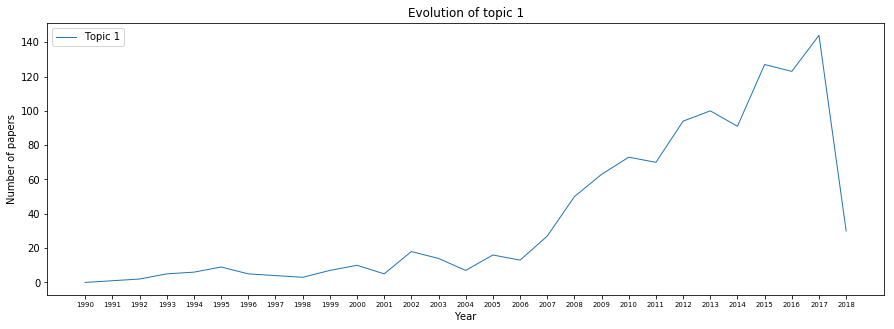

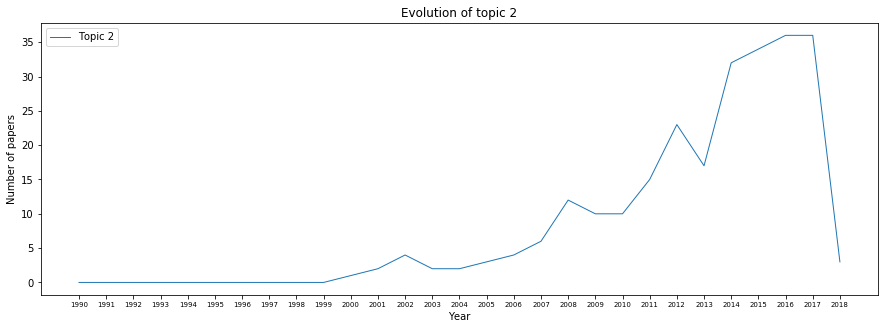

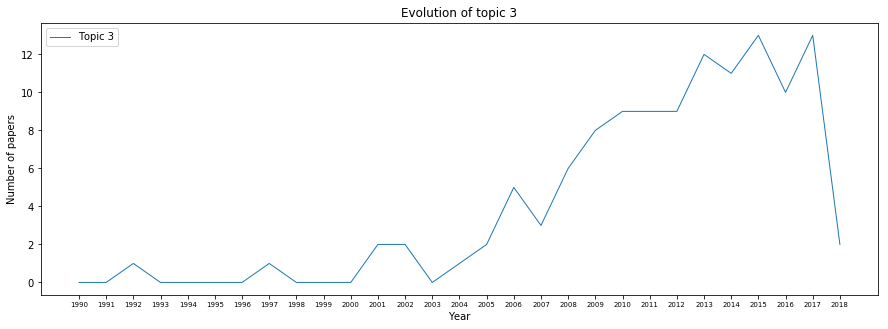

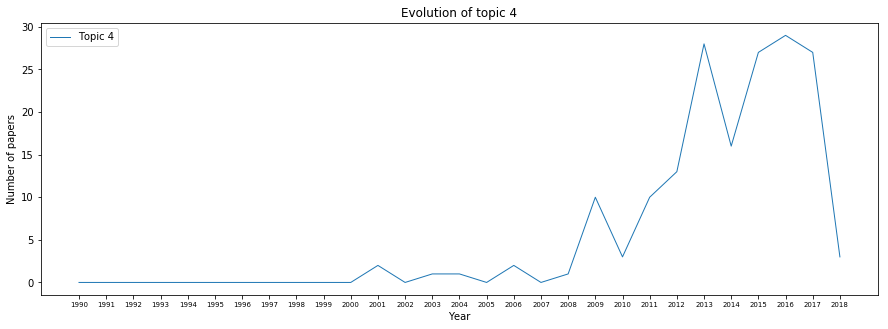

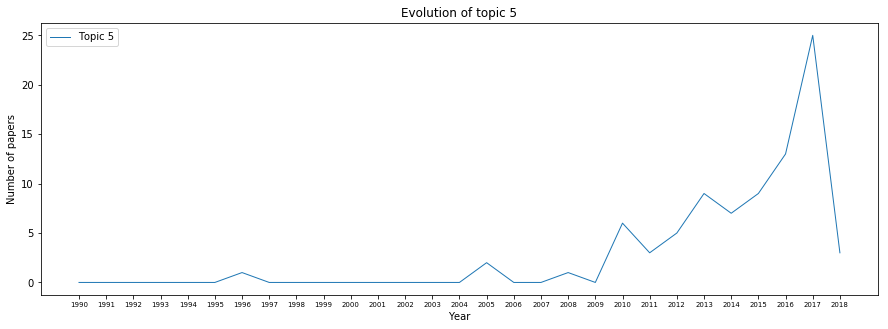

In [87]:
plotTopicYear(startYear = 1990, endYear = 2018, topicNumber = 5, topicPapers = topicPapers)

## Visualisation of the evolution of all the topics in the same figure

In [89]:
def plotAlltopicYear(startYear, endYear, topicNumber, topicPapers):
    """
    plot evolution of all topics in one figure between startYear and endYear
    :param startYear: start year
    :param endYear: end year
    :param topicNumber:  number of topics
    :param topicPapers:
    :return: void
    """
    
    years = list(range(startYear, endYear + 1))
    plt.figure(figsize=(15, 5))  # figure size
    lengendTitle = []
    for i in range(topicNumber):
        topic = topicPapers[np.where(topicPapers[:, -1] == i)]   # get  papers of specific topic
        topicYear = topic[:, 1]
        unique, counts = np.unique(topicYear, return_counts=True)     # get number of papers on each year
        unique = unique.tolist()                                      # years
        counts = counts.tolist()                                      # number of papers
        for j in years:
            if (unique.count(j) == 0):
                counts.insert(j - startYear, 0)
        plt.plot(years, counts, linewidth=1)
        lengendTitle.append("Topic " + str(i+1))

    plt.xlabel('Year')                        # add x label
    plt.ylabel('Number of papers')            # add y label
    plt.title('Evolution of topics')          # add title
    plt.legend(lengendTitle, loc=2)           # add legend
    plt.xticks(years, years)
    plt.show()

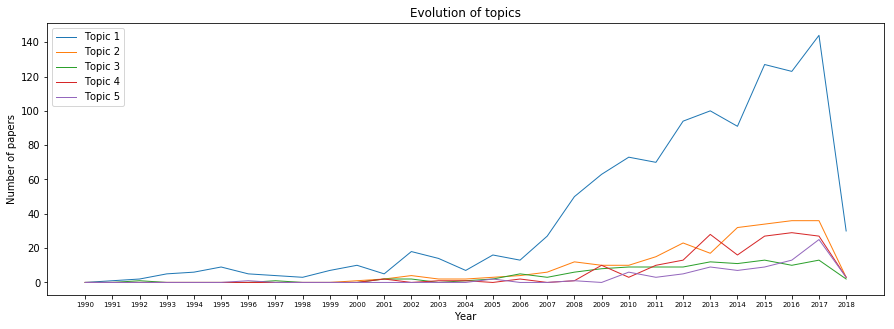

In [90]:
plotAlltopicYear(startYear = 1990, endYear = 2018, topicNumber= 5, topicPapers= topicPapers)

***Remark:*** Topic N°5 is the most cited in papers over the years 

# Trend Detection
In order to detect the trend, we decided to use a metric as follow:

metric = (weightUCL180 * usageCountLast180Days) + (weightTC * TimesCited) + (weightUCS2013 * UsageCountSince2013)

In [91]:
def metric(usageCountLast180Days, TimesCited, UsageCountSince2013):
    """
    metric to evaluate the trend of each topic
    it combines this parameters (Usage-Count-Last-180-days, Usage-Count-Since-2013 ,Times-Cited) with different weight
    it uses the following formula
    metric = (weightUCL180 * usageCountLast180Days) + (weightTC * TimesCited) + (weightUCS2013 * UsageCountSince2013)
    :param usageCountLast180Days: int
    :param TimesCited: int
    :param UsageCountSince2013: int
    :return: metric as real number
    """
    weightUCL180 = 0.7
    weightTC = 0.2
    weightUCS2013 = 0.1
    result = (weightUCL180 * usageCountLast180Days) + (weightTC * TimesCited) + (weightUCS2013 * UsageCountSince2013)
    return result

## Find the most 20 trending papers from the dataset

In [94]:
def trendingPapers( topicPapers):
    """
    compute the metric for each papers and print the most 20 trending papers
    :param topicPapers: numpy array contains papers with topic id
    :return: numpy array contains papers title , its topic id and metric value
    """
    # Detect most tranding papers without topic segmentation
    countPapers = topicPapers.shape[0]  # number of papers
    Trendvalues = np.empty((0, 3))
    for i in range(countPapers):
        metricValue = metric(int(topicPapers[i][7]), int(topicPapers[i][6]), int(topicPapers[i][8]))  # compute metric for each paper
        Trendvalues = np.append(Trendvalues, [[topicPapers[i][0], topicPapers[i][-1], metricValue]], axis=0) # add trend value to papers
    TopTrendingDocs = Trendvalues[Trendvalues[:, 2].argsort()[::-1]]  # sort papers by metric
    print(" \n Most Trending papers: \n")
    for k in range(20):
        print("Paper title " + str(k+1) + " :" + TopTrendingDocs[k][0])  # print most 20 trending papers
    return TopTrendingDocs

In [95]:
TopTrendingDocs = trendingPapers(topicPapers)

 
 Most Trending papers: 

Paper title 1 :A survey on opinion mining and sentiment analysis: Tasks, approaches and applications
Paper title 2 :EVENT-RELATED BRAIN POTENTIALS DURING NATURAL SPEECH PROCESSING - EFFECTS OF SEMANTIC, MORPHOLOGICAL AND SYNTACTIC VIOLATIONS
Paper title 3 :A design for a common-sense knowledge-enhanced decision-support system: Integration of high-frequency market data and real-time news
Paper title 4 :Neural correlates of irony comprehension: The role of schizotypal personality traits
Paper title 5 :Verification of text ideas during reading
Paper title 6 :Ranking product aspects through sentiment analysis of online reviews
Paper title 7 :Making words work: Using financial text as a predictor of financial events
Paper title 8 :Can prosody aid the automatic classification of dialog acts in conversational speech?
Paper title 9 :Grammatical understanding, literacy and text messaging in school children and undergraduate students: A concurrent analysis
Paper title 

## Find the most 3 trending papers per topic.

In [105]:
def trendingTopic(topicNumber, TopTrendingPapers):
    # trending papers in each topic
    """
    print the most 3 trending papers for each topic and return
    compute the trending value of each topic: mean of papers metric values
    :param topicNumber: int:  number of topic
    :param TopTrendingPapers: numpy array contains papers title , its topic id and metric value
    :return: numpy array contains topicid and its trending value
    """
    topicRank = np.empty((0,2))
    for i in range(topicNumber):
        GroupByTopic = TopTrendingPapers[np.where(TopTrendingPapers[:, 1] == str(i))]   # group papers by topic id
        print('\n Tranding papers in Topic ' + str(i+1) + '\n')
        TrendingDocs = (GroupByTopic[GroupByTopic[:,2].argsort()[::-1]])     # sort according to metric value in decreasing order
        TrendingDocs = TrendingDocs[:3]                                         # get the first 3 rows
        for j in range(TrendingDocs.shape[0]):
            print("paper " + str(j+1) + ": " + TrendingDocs[j][0])      # print most 3 trending papers for each topic
        meanValue = np.mean(GroupByTopic[:,2].astype(np.float))
        topicRank = np.append(topicRank,[[i,meanValue]],axis=0)
    return topicRank

In [106]:
topicRank = trendingTopic(topicNumber = 5, TopTrendingPapers = TopTrendingDocs )


 Tranding papers in Topic 1

paper 1: EVENT-RELATED BRAIN POTENTIALS DURING NATURAL SPEECH PROCESSING - EFFECTS OF SEMANTIC, MORPHOLOGICAL AND SYNTACTIC VIOLATIONS
paper 2: A design for a common-sense knowledge-enhanced decision-support system: Integration of high-frequency market data and real-time news
paper 3: Making words work: Using financial text as a predictor of financial events

 Tranding papers in Topic 2

paper 1: Writing profiles: the effect of the writing mode on pausing and revision patterns of experienced writers
paper 2: Rhetorical structure and persuasive language in the subgenre of online advertisements
paper 3: Assessing the microstructure of written language using a retelling paradigm

 Tranding papers in Topic 3

paper 1: Neural correlates of irony comprehension: The role of schizotypal personality traits
paper 2: Verification of text ideas during reading
paper 3: Grammatical understanding, literacy and text messaging in school children and undergraduate students:

## Plot topic with correspending to each metric value as a histogram

In [107]:
def plotTrendTopics(TopicRank):
    """
    plot topic with correspending to ech metric value as a histogram
    :param TopicRank: numpy array contains topicid and its trending value
    :return: void
    """
    x = TopicRank[:, 0] + 1
    y = TopicRank[:, 1]
    plt.bar(x, y)
    plt.title("Topic trends")
    plt.xlabel("Topic number")
    plt.ylabel("metric value")
    plt.show()

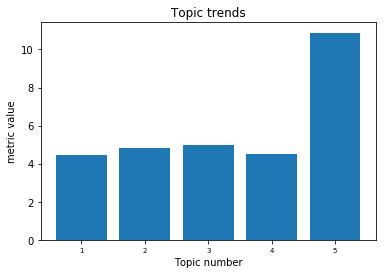

In [108]:
plotTrendTopics(topicRank)